In [1]:
from pathlib import Path

import sys
import os
    
from smfret_analysis import Tracker, print_info

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 2.0.dev
(git revision 1.0-24-g5827abb)
Output version 8
Using sdt-python version 13.2.dev


In [8]:
data_dir = "data"
### Start fresh
# donor origin, acceptor origin, size
tr = Tracker((292, 0), (0, 0), (189, 138), "ce" + "da" * 150 + "c", data_dir=data_dir)
### or load
#tr = Tracker.load(data_dir=data_dir)

<IPython.core.display.Javascript object>


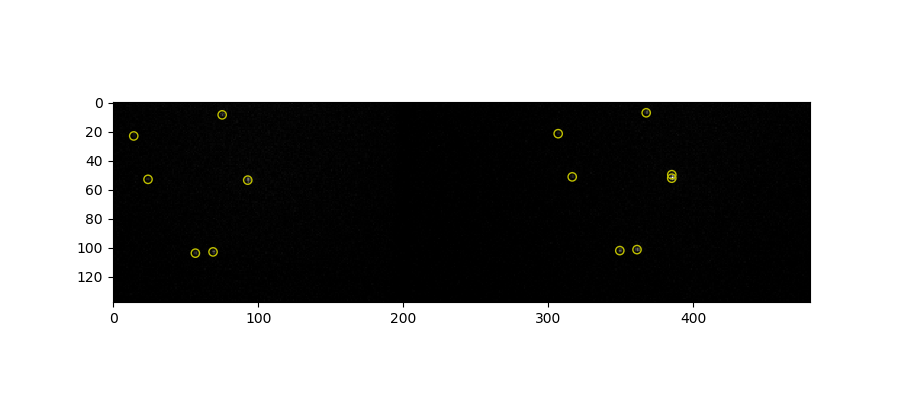

In [8]:
%matplotlib notebook
tr.set_bead_loc_opts(Path("beads", "beads_\d+_.SPE"))

Label(value='Starting…')

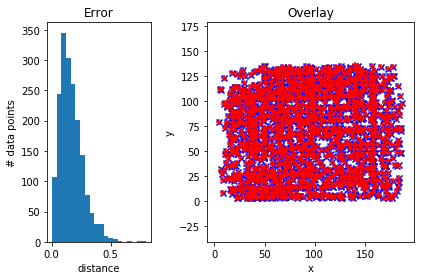

In [9]:
%matplotlib inline
tr.make_chromatic()

In [11]:
tr.add_dataset("sensor IEk non-act BSA cells",
               Path("sensor-IEk_non-act_BSA", r"cells-(\d{2})_(\d{3})_.SPE"), cells=True)
tr.add_dataset("sensor IEk non-act BSA no-cells",
               Path("sensor-IEk_non-act_BSA", r"no-cells_(\d{3})_.SPE"))
tr.add_dataset("sensor J4 non-act BSA cells",
               Path("sensor-J4_non-act_BSA", r"cells-(\d{2})_(\d{3})_.SPE"), cells=True)
tr.add_dataset("sensor J4 non-act BSA no-cells",
               Path("sensor-J4_non-act_BSA", r"no-cells_(\d{3})_.SPE"))
tr.add_dataset("sensor J4 act-IEk-his BSA cells",
               Path("sensor-J4_act-IEk-his_BSA", r"cells-(\d{2})_(\d{3})_.SPE"), cells=True)
tr.add_dataset("sensor J4 act-IEk-his BSA no-cells",
               Path("sensor-J4_act-IEk-his_BSA", r"no-cells_(\d{3})_.SPE"))

<IPython.core.display.Javascript object>


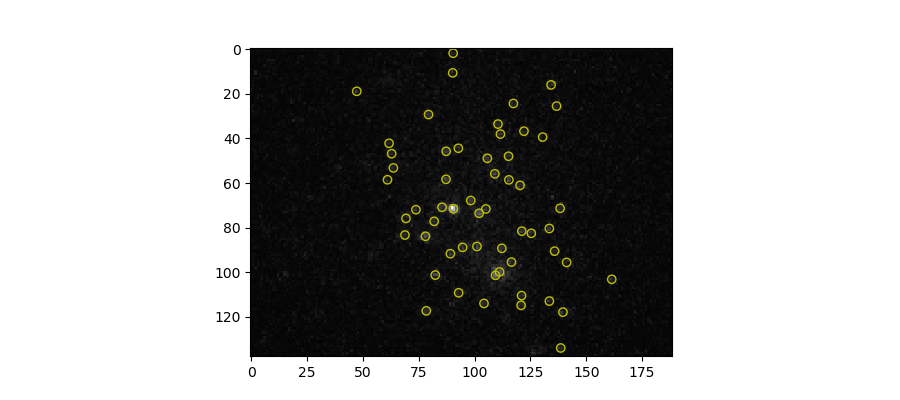

In [13]:
%matplotlib notebook
tr.set_don_loc_opts("sensor IEk non-act BSA cells", 1)

<IPython.core.display.Javascript object>


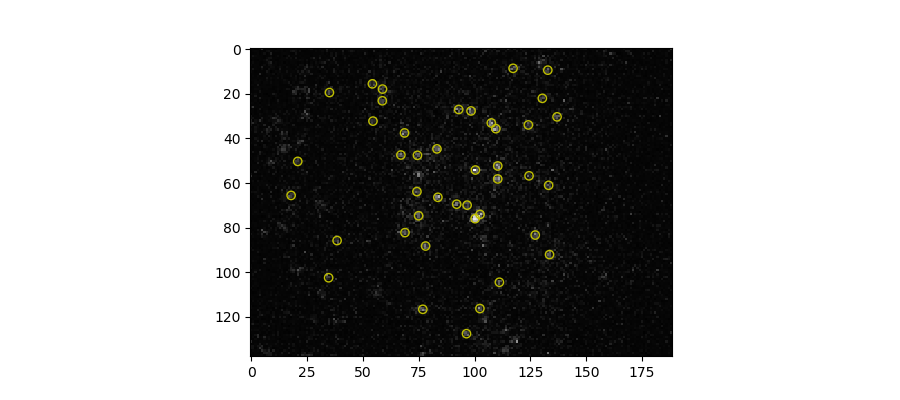

In [14]:
tr.set_acc_loc_opts("sensor IEk non-act BSA cells", 0)

In [20]:
tr.locate()

Label(value='Starting…')

In [21]:
tr.track(feat_radius=4, bg_frame=3, link_radius=2, link_mem=3, min_length=4, bg_estimator="mean")

Label(value='Starting…')

In [36]:
tr.analyze()

In [9]:
tr.extract_cell_images()
tr.extract_profile_images("donor", Path("profile", r"green_.*"))
tr.extract_profile_images("acceptor", Path("profile", r"red_.*"))

In [14]:
tr.save()